# You should be writing your code only between the **##YOUR CODE BEGINS** and **##YOUR CODE ENDS** in a code cell for a question

# **Part 1) This is a Regression problem. The code below will read in the dataset.** 

In [ ]:
#RUN THIS CELL, DO NOT CHANGE ANY CODE IN THIS CELL
#The code below just reads in the data
import pandas as pd

#Get the data
!pip install -U -q PyDrive

#File ID
f_id = '1qsp014GzJLQq6BrNtnVelUo33NLM9lcg'

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import zipfile, os

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download the file
dataFile = drive.CreateFile({'id': f_id})
dataFile.GetContentFile('file3.csv')

dataset = pd.read_csv('file3.csv')

print(dataset.head())

   Unnamed: 0        x1        x2        x3        x4        x5           y
0           0 -0.579274  0.305763  0.250004  0.296727 -0.150400   28.098637
1           1  0.426241  0.713785  1.154809 -0.801243 -0.220663   81.676676
2           2 -0.278835 -1.032538  2.194766 -0.789030 -0.886804  171.485963
3           3 -0.094141 -0.107288  1.193119 -2.748668 -0.936070   41.832180
4           4 -0.623868  0.920848  1.870735 -1.158049  0.330941  135.412206


**Q1) The features in the dataset are x1, x2, x3, x4, x5. Target column to be predicted is the column y. In the cell below you should assign these to X and y variabes. (5 points)** 

In [ ]:
##YOUR CODE BEGINS
# Split the data into the features and the target 
dataset = pd.DataFrame(dataset)
dataset = dataset.values
# Features
X = dataset[:, 1:4]  # Column 2 to 5: X1 to X4 from dataset
# Target 
y = dataset[:, 5]    # Column 6 : Y from dataset

##YOUR CODE ENDS
print(X[0:5,:])
print(y[0:5])

[[-0.5792736   0.30576298  0.25000432]
 [ 0.42624066  0.71378528  1.15480867]
 [-0.2788354  -1.03253809  2.19476595]
 [-0.09414128 -0.10728797  1.19311861]
 [-0.62386771  0.92084822  1.87073479]]
[-0.15039971 -0.22066262 -0.88680392 -0.93606983  0.33094097]


**We will now split the data into Training Set and Test Set**

In [ ]:
#RUN THIS CELL, DO NOT CHANGE ANY CODE IN THIS CELL
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=48)
print(X_train[0:5,:])

[[-0.27788057 -1.1335841   0.81048203]
 [-0.35781506  0.68838607 -0.94086023]
 [ 0.40139981  0.13021316 -1.29316674]
 [-0.33866745  1.45052409 -1.19780196]
 [ 1.39768739 -1.74730623 -0.61427936]]


**Q2) Write the code in the cell below for defining the model, compile, and fit. For this question, you may want to try different model architectures and hyperparameters, however when you submit there should be just one model defined (10 points).**

In [ ]:
##YOUR CODE BEGINS
import tensorflow as tf
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
regressor=LinearRegression()
regressor.fit(x,y)

# Now lets define our Tensorflow model
model=tf.keras.models.Sequential([
  tf.keras.layers.Dense(units=1,input_shape=[1])
])

# Specifying learning rate and momentum with desired optimizer
model.compile(
        optimizer=tf.keras.optimizers.SGD(0.01, 0.9),loss='mse'
        )

#learning rate scheduler
def learning_rate_scheduler(epoch,lr):
  if epoch>=50:
    return 0.0001
  return 0.001


# Normalize the features
# Normalizing or standardization.
scaler = StandardScaler()
X_norm = scaler.fit_transform(X) 

print("X_nomm.shape:", X_norm.shape)

# learning rate scheduler 
# calling learning_rate_scheduler function 
scheduler=tf.keras.callbacks.LearningRateScheduler(learning_rate_scheduler)

# Train the model
r = model.fit(
    x,y, epochs=10, validation_split=0.3, verbose=0, callbacks=[scheduler]
    ) 

# get model weights
weights = model.layers[0].get_weights()

print("Intercept: ", regressor.intercept_)
print("Coefficient of Regressin :", regressor.coef_)
print("Weoghts :", weights)
##YOUR CODE ENDS

X_nomm.shape: (10000, 3)
Intercept:  0.029264537392055354
Coefficient of Regressin : [-7.55345661e-06]
Weoghts : [array([[nan]], dtype=float32), array([nan], dtype=float32)]


**Q3) In the cell below, write the code for plotting the training and validation (testing) loss plot (5 points)**

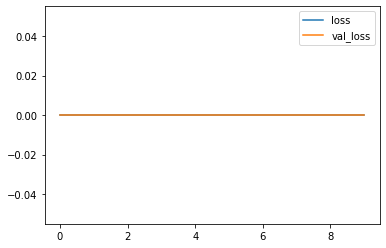

In [ ]:
##YOUR CODE BEGINS
import matplotlib.pyplot as plt
# Ploting loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

##YOUR CODE ENDS

**Q4) Using the model you have trained, make a prediction for the following new instance:**
**x1=0.65, x2=1.36, x3=0.63, x4=0.37, x5=2.14** 
**(5 points)**



In [ ]:
##YOUR CODE BEGINS
import numpy as np
from sklearn.preprocessing import StandardScaler
# Making predictions and evaluating the model
scaler = StandardScaler()
custom_prediction = model.predict(scaler.transform(np.array([[0,0.65, 1.36, 0.63, 0.37,2.14]])))
print("Custom Prediction: ", customer_prediction)
##YOUR CODE ENDS


NotFittedError: ignored

# **Part 2) This is a Classification problem. The code below will read in the dataset.** 

In [ ]:
#RUN THIS CELL, DO NOT CHANGE ANY CODE IN THIS CELL
#The code below just reads in the data
import pandas as pd

#Get the data
!pip install -U -q PyDrive

#File ID
f_id = '1zG-N6qWINHcZjCCmJv0HoCsgD0NOuP5U'

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import zipfile, os

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download the file
dataFile = drive.CreateFile({'id': f_id})
dataFile.GetContentFile('file4.csv')

dataset = pd.read_csv('file4.csv')

print(dataset.head())

   Unnamed: 0  y        x1        x2        x3        x4
0           0  1 -1.469518  0.277157 -0.434565 -0.752472
1           1  2 -0.813746 -1.111410  1.084282  1.104113
2           2  1 -0.208016  0.614240 -1.291888  2.329259
3           3  0 -0.811774 -0.962225 -0.963309 -1.265497
4           4  0 -2.321035  0.275044  0.117162 -1.446115


**Q5) The features in the dataset are x1, x2, x3, x4. Class label is the column with the heading y. In the cell below you should assign these to X and y variabes (5 points)** 

In [ ]:
##YOUR CODE BEGINS
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

dataset = pd.DataFrame(dataset)
dataset = dataset.values
# # Features
X = np.array(dataset[:, 1:4]).astype(np.float32)  # Column 2 to 5: X1 to X4 from dataset
# Target 
y = dataset[:, 5]    # Column 6 : Y from dataset

print(X.shape)
print(y.shape)

X = X.transpose()

##YOUR CODE ENDS
print(X[0:5,:])
print(y[0:5])

(10000, 3)
(10000,)
[[-0.5792736   0.42624065 -0.27883542 ...  1.4184124  -2.4579523
   0.5931936 ]
 [ 0.30576298  0.7137853  -1.032538   ... -0.25577837  0.10316233
   0.5459834 ]
 [ 0.25000432  1.1548086   2.194766   ... -1.7506001   0.21016933
   0.22459102]]
[-0.15039971 -0.22066262 -0.88680392 -0.93606983  0.33094097]


**We will now split the data into Training Set and Test Set**

In [ ]:
#RUN THIS CELL, DO NOT CHANGE ANY CODE IN THIS CELL
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=32, stratify=y)
print(X_train[0:5,:])
print(y_train[0:5])

ValueError: ignored

**Q6) Print the number of classes and the number of instances per class in the training set (5 points)**

In [ ]:
##YOUR CODE BEGINS
from sklearn.preprocessing import StandardScaler
# Normalizing or standardization.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
# we use transform here to avoid data leackage
X_test = scaler.transform(X_test)

print("x_train.shape:", X_train.shape)
print("x_test.shape:", X_test.shape)

# To verify the number of class labels, we cast y_train as a set and print its 
# length
# K -- number of classes
K = len(set(y_train))
print("number of classes:", K)
##YOUR CODE ENDS

**Q7) Write the code in the cell below for defining the model, compile, and fit. For this question, you may want to try different model architectures and hyperparameters, however when you submit there should be just one model defined (10 points).**

In [ ]:
##YOUR CODE BEGINS
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu', padding='same')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu', padding='same')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu', padding='same')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

# Compile and fit
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

##YOUR CODE ENDS

**Q8) In the cell below, write the code for plotting the training and validation (testing) loss plot (5 points)**

In [ ]:
##YOUR CODE BEGINS
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

##YOUR CODE ENDS

**Q9) In the cell below, write the code for plotting the training and validation (testing) accuracy plot (5 points)** 

In [ ]:
##YOUR CODE BEGINS
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

##YOUR CODE ENDS

**Q10) Using the model you have trained, make a prediction for the following  instance: x1=0.55, x2=-1.79, x3=1.49, x4=1.72. That is, you should not just display the probabilities, you should mention which class label is getting predicted (5 points)**

In [ ]:
##YOUR CODE BEGINS
# Predicting the Test and custom results
y_pred = model.predict(X_test)
# predicting x1=0.55, x2=-1.79, x3=1.49, x4=1.72
c_prediction = model.predict(scaler.transform(np.array([[0, 0, 0, 0.55, -1.79, 1.49, 1.72]])))

print("Predicting the Test set results: ", y_pred)
print("Customer Prediction: ", customer_prediction)

##YOUR CODE ENDS

# **Part 3) Image Classification with CNN. The following code will first read in the image data which is in zip file. The images consist of apple and banana, which will be our two class labels. The contents of the .zip are extracted to the base directory /tmp/apple-banana, which contains train and validation subdirectories for the training and validation datasets, which in turn each contain apple and banana subdirectories.**

In [ ]:
#RUN THIS CELL, DO NOT CHANGE ANY CODE IN THIS CELL
#Get the data
!pip install -U -q PyDrive

#File ID
zip_id = '1sqhjr9h_Rz8z5qTZQEk9EOL7-TPe3_MK'

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import zipfile, os

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download the zip file
myzip = drive.CreateFile({'id': zip_id})
myzip.GetContentFile('apple-banana.zip')

!unzip -qq -o apple-banana.zip -d /tmp
!ls /tmp/apple-banana

training  validation


In [ ]:
#RUN THIS CELL, DO NOT CHANGE ANY CODE IN THIS CELL
!ls /tmp/apple-banana/training

apple  banana


In [ ]:
#RUN THIS CELL, DO NOT CHANGE ANY CODE IN THIS CELL
!ls /tmp/apple-banana/validation

apple  banana


In [ ]:
#RUN THIS CELL, DO NOT CHANGE ANY CODE IN THIS CELL
!ls /tmp/apple-banana/training/apple

0_100.jpg    107_100.jpg  114_100.jpg  122_100.jpg  19_100.jpg	27_100.jpg
100_100.jpg  108_100.jpg  115_100.jpg  123_100.jpg  20_100.jpg	28_100.jpg
10_100.jpg   109_100.jpg  116_100.jpg  124_100.jpg  2_100.jpg	29_100.jpg
101_100.jpg  1_100.jpg	  117_100.jpg  13_100.jpg   21_100.jpg	30_100.jpg
102_100.jpg  110_100.jpg  118_100.jpg  14_100.jpg   22_100.jpg	31_100.jpg
103_100.jpg  11_100.jpg   119_100.jpg  15_100.jpg   23_100.jpg
104_100.jpg  111_100.jpg  120_100.jpg  16_100.jpg   24_100.jpg
105_100.jpg  112_100.jpg  12_100.jpg   17_100.jpg   25_100.jpg
106_100.jpg  113_100.jpg  121_100.jpg  18_100.jpg   26_100.jpg


In [ ]:
#RUN THIS CELL, DO NOT CHANGE ANY CODE IN THIS CELL
!ls /tmp/apple-banana/training/banana

0_100.jpg   39_100.jpg	47_100.jpg  55_100.jpg	63_100.jpg  71_100.jpg
10_100.jpg  40_100.jpg	48_100.jpg  56_100.jpg	64_100.jpg  72_100.jpg
1_100.jpg   4_100.jpg	49_100.jpg  57_100.jpg	65_100.jpg  73_100.jpg
11_100.jpg  41_100.jpg	50_100.jpg  58_100.jpg	66_100.jpg  8_100.jpg
2_100.jpg   42_100.jpg	5_100.jpg   59_100.jpg	67_100.jpg  9_100.jpg
3_100.jpg   43_100.jpg	51_100.jpg  60_100.jpg	68_100.jpg
35_100.jpg  44_100.jpg	52_100.jpg  6_100.jpg	69_100.jpg
37_100.jpg  45_100.jpg	53_100.jpg  61_100.jpg	70_100.jpg
38_100.jpg  46_100.jpg	54_100.jpg  62_100.jpg	7_100.jpg


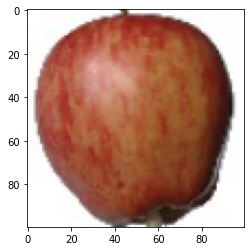

In [ ]:
#RUN THIS CELL, DO NOT CHANGE ANY CODE IN THIS CELL
# check out an image from the apple class
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
plt.imshow(image.load_img('/tmp/apple-banana/training/apple/0_100.jpg'))
plt.show()

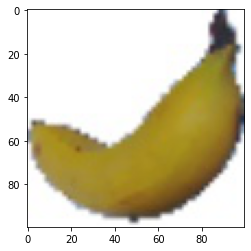

In [ ]:
#RUN THIS CELL, DO NOT CHANGE ANY CODE IN THIS CELL
# check out an image from the banana class
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
plt.imshow(image.load_img('/tmp/apple-banana/training/banana/0_100.jpg'))
plt.show()

**Q11) We need to perform classification of images into the two classes 'apple', or 'banana'. However, we have not explicitly labeled the images. The ImageDataGenerator will use the name of the directory as labels. For that you need to define the directories in the cell below (5 points).**

In [ ]:
##YOUR CODE BEGINS

# now let's set up the proper directory structure
# let start with creating the appropriate directories
# Make appropriate directories 
!mkdir data                           # parent dir
!mkdir data/train
!mkdir data/test
!mkdir data/train/apple
!mkdir data/train/banana
!mkdir data/test/apple
!mkdir data/test/banana
!ls



##YOUR CODE ENDS

adc.json  apple-banana.zip  data  file3.csv  file4.csv	sample_data


**Q12) Now display the number of training and validation (testing) images we have for each class (5 points).** 

In [ ]:
##YOUR CODE BEGINS
from glob import glob
# now let's move the data to the appropriate directories
# Move the images
# Note: we will consider 'training' to be the train set
#       'validation' folder will be the test set
#       ignore the 'evaluation' set
!mv /tmp/apple-banana/training/apple/*.jpg data/train/apple
!mv /tmp/apple-banana/training/banana/*.jpg data/train/banana
!mv /tmp/apple-banana/validation/apple/*.jpg data/test/apple
!mv /tmp/apple-banana/validation/banana/*.jpg data/test/banana

# process the image : standarization
# These images are pretty big and of different sizes
# Let's load them all in as the same (smaller) size
IMAGE_SIZE = [200, 200]

# set up path for training and validation
train_path = 'data/train'
valid_path = 'data/test'

# useful for getting number of files
image_files = glob(train_path + '/*/*.jpg')
valid_image_files = glob(valid_path + '/*/*.jpg')
print('Number of images for training: ', len(image_files))
print('Number of images for validation: ', len(valid_image_files))

##YOUR CODE ENDS

mv: cannot stat '/tmp/apple-banana/training/apple/*.jpg': No such file or directory
mv: cannot stat '/tmp/apple-banana/training/banana/*.jpg': No such file or directory
mv: cannot stat '/tmp/apple-banana/validation/apple/*.jpg': No such file or directory
mv: cannot stat '/tmp/apple-banana/validation/banana/*.jpg': No such file or directory
Number of images for training:  100
Number of images for validation:  30


**Q13) Define a CNN model that has no more than two Conv-Pool layers. Our dataset is small so don't make the model any more complex. (10 points).**

In [ ]:
##YOUR CODE BEGINS
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.applications.vgg16 import VGG16 as PretrainedModel, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# useful for getting number of classes
folders = glob(train_path + '/*')
print(folders)

# STAGE 1
# let's create an instance of the VVG16 using our IMAGE_SIZE
ptm = PretrainedModel(
    input_shape=IMAGE_SIZE + [3],
    weights='imagenet',
    include_top=False)

# let's freeze the VVG16 instance stage 1 we created 
# for pretrained model weights
ptm.trainable = False

# STAGE 2 
# let's create our classifier
# map the data into feature vectors

# Keras image data generator returns classes one-hot encoded
K = len(folders) # number of classes
x = Flatten()(ptm.output)
x = Dense(K, activation='softmax')(x)

# create a model object
# combine stage 1 -- inputs=ptm.input
# and stage 2 -- outputs=x
model = Model(inputs=ptm.input, outputs=x)

# view the structure of the model
model.summary()

##YOUR CODE ENDS

['data/train/banana', 'data/train/apple']
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxP

**Q14) Write the compile statement for the CNN you defined. Then, define the data generators for the CNN (5 points).** 

In [ ]:
##YOUR CODE BEGINS

# create an instance of ImageDataGenerator
# this is where we are aolso doing some of the preprocessing
gen_train = ImageDataGenerator(
  rotation_range=20,
  width_shift_range=0.1,
  height_shift_range=0.1,
  shear_range=0.1,
  zoom_range=0.2,
  horizontal_flip=True,
  preprocessing_function=preprocess_input
)

# we don't augment test image but we have to precess them
gen_test = ImageDataGenerator(
  preprocessing_function=preprocess_input
)

# using a batch size of 32
batch_size = 32

# create generators
train_generator = gen_train.flow_from_directory(
  train_path,               # this is the training data path we setup earlier
  shuffle=True,
  target_size=IMAGE_SIZE,   # image size that we define for standarization
  batch_size=batch_size,
)
valid_generator = gen_test.flow_from_directory(
  valid_path,               # this is the validation data path we setup earlier
  target_size=IMAGE_SIZE,   # image size that we define for standarization
  batch_size=batch_size,
)

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

##YOUR CODE ENDS

Found 100 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


**Q15) Fit the CNN by calling the fit function (5 points).**

In [ ]:
##YOUR CODE BEGINS
# Now let's train our model
# fit the model
r = model.fit(
  train_generator,
  validation_data=valid_generator,
  epochs=10,
  steps_per_epoch=int(np.ceil(len(image_files) / batch_size)),
  validation_steps=int(np.ceil(len(valid_image_files) / batch_size)),
)

##YOUR CODE ENDS

Epoch 1/10
4/4 [==============================] - 2s 315ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
4/4 [==============================] - 1s 246ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
4/4 [==============================] - 1s 239ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
4/4 [==============================] - 1s 237ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
4/4 [==============================] - 1s 329ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
4/4 [==============================] - 1s 241ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
4/4 [==============================] - 1s 235ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss

**Q16) Plot the loss (5 points)**

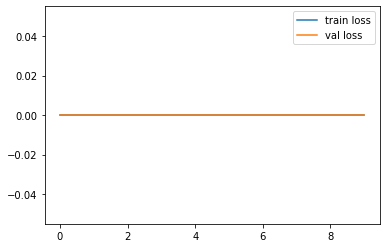

In [ ]:
##YOUR CODE BEGINS

# Plot loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

##YOUR CODE ENDS

**Q17) Plot the accuracy (5 points)**

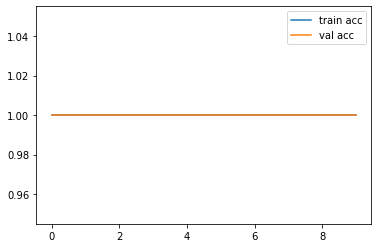

In [ ]:
##YOUR CODE BEGINS

# Plot accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

##YOUR CODE ENDS